In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
configmodel='./ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozenmodel='./frozen_inference_graph.pb'

In [3]:
model = cv2.dnn.DetectionModel(frozenmodel, configmodel)

In [4]:
classname=[]
classfile='./coco.names'
with open(classfile,'rt') as f :
    classname=f.read().rstrip("\n").split("\n")
print(classname)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
print(len(classname))

80


In [6]:

model.setInputSize(370, 370)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000029809545AB0>

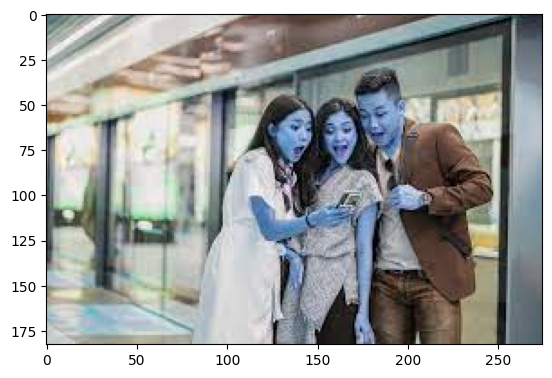

In [7]:
img=cv2.imread('./download.jpeg')
plt.imshow(img)

In [8]:
cap=cv2.VideoCapture('./test.mp4')
cap.set(cv2.CAP_PROP_FRAME_WIDTH,450) #width 
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,450) #height 
cap.set(cv2.CAP_PROP_BRIGHTNESS,150) #brigtness
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out=cv2.VideoWriter("motion_detection.mp4",fourcc,30,(1280,720))
while True:
    _,frame=cap.read()
    classindex,confd,bbox=model.detect(frame,confThreshold=0.62)
    if len(classindex)!=0:
        for classind,conf,boxs in zip(classindex,confd,bbox):
            if(classind<=80):
               cv2.rectangle(frame,boxs,(0,0,0),2)
               cv2.putText(frame,classname[classind-1],(boxs[0]+10,boxs[1]+40),cv2.FONT_HERSHEY_COMPLEX,2,(255,0,255),3)
    cv2.imshow("Out",frame)
    if cv2.waitKey(1)==27:
        break
cap.release()
cv2.destroyAllWindows()

